In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


xG=pd.read_csv('understat.com.csv')
xG_pg=pd.read_csv('understat_per_game.csv')  
xG_player=pd.read_csv('Data.csv')  
results=pd.read_csv('Results.csv')

xG.rename(columns={xG.columns[1]: 'year'}, inplace=True)
xG.rename(columns={xG.columns[0]: 'league'}, inplace=True)


xG.to_csv('understat.com.csv', index=False)

xG=xG[xG['league'].str.strip() != 'RFPL']


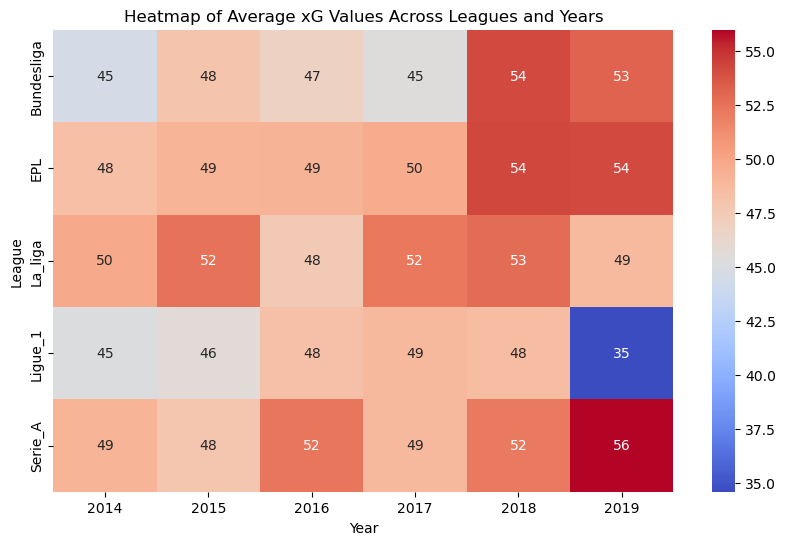

In [10]:
pivot_table = xG.pivot_table(index='league', columns='year', values='xG', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True)
plt.title('Heatmap of Average xG Values Across Leagues and Years')
plt.ylabel('League')
plt.xlabel('Year')

plt.show()

In [18]:
xG.describe()


,year,position,matches,wins,draws,loses,scored,missed,pts,xG,...,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff,scoring_efficiency,defensive_efficiency
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,...,588.000000,5.880000e+02,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,2016.500000,10.316327,36.904762,13.850340,9.204082,13.850340,50.362245,50.362245,50.755102,49.255120,...,44.985819,1.450087e-16,10.946755,10.946742,213.397959,213.397959,50.952090,0.196988,1.107125,1.107125
std,1.709279,5.682569,2.288653,5.970517,2.982490,5.564984,17.460778,13.140302,17.130461,14.123284,...,10.045027,2.009748e+01,2.536091,3.396665,85.532851,54.928277,13.541364,7.289132,7.067823,6.786344
min,2014.000000,1.000000,27.000000,2.000000,2.000000,1.000000,22.000000,17.000000,13.000000,24.651134,...,19.278818,-4.220877e+01,5.683535,4.394458,91.000000,83.000000,25.205500,-24.721600,-18.148854,-16.370737
25%,2015.000000,5.000000,38.000000,10.000000,7.000000,10.000000,38.000000,42.000000,39.000000,39.540722,...,38.099174,-1.402462e+01,9.131749,8.805433,157.000000,172.750000,40.969275,-4.522375,-3.683981,-3.824081
50%,2016.500000,10.000000,38.000000,12.000000,9.000000,14.000000,47.000000,50.000000,47.000000,46.182311,...,45.154377,-3.420010e+00,10.590136,10.316477,190.000000,210.000000,48.463500,0.116050,0.343620,1.197029
75%,2018.000000,15.000000,38.000000,17.000000,11.000000,18.000000,58.000000,59.000000,61.000000,54.995250,...,51.343409,1.012526e+01,12.467528,12.181253,244.250000,253.000000,58.900350,5.013800,5.105163,5.787535
max,2019.000000,20.000000,38.000000,32.000000,18.000000,29.000000,118.000000,94.000000,100.000000,113.598270,...,78.535447,7.304931e+01,21.896752,30.468113,582.000000,375.000000,94.380000,23.047500,30.963020,29.175087


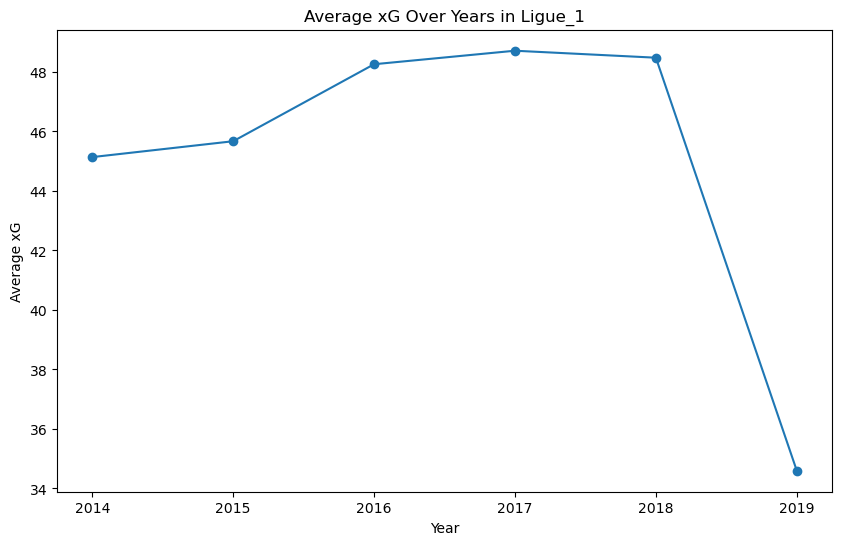

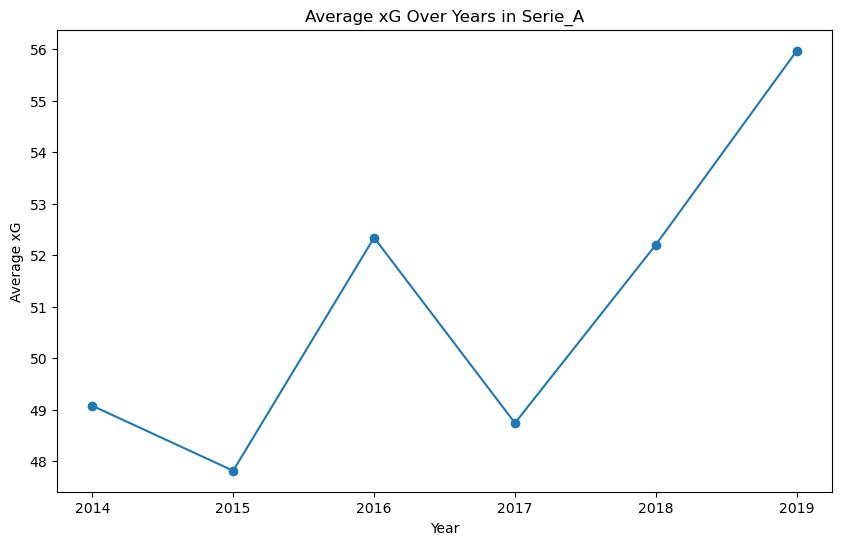

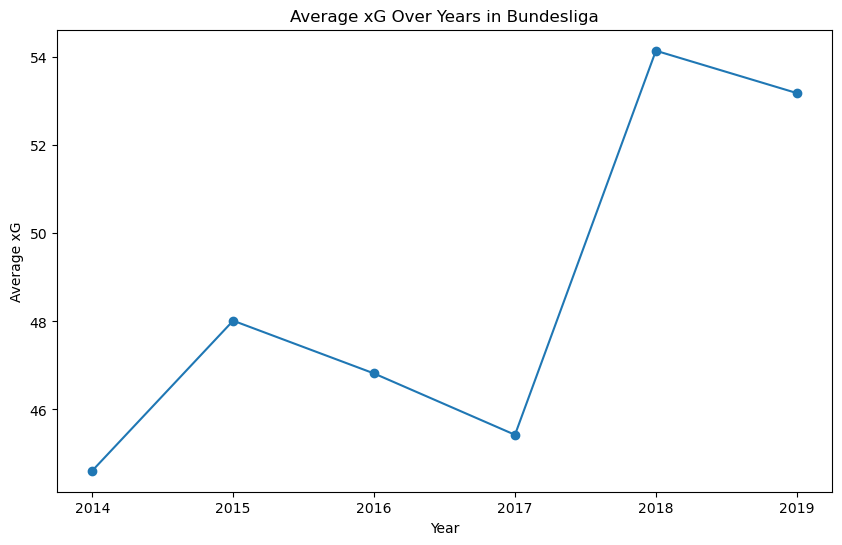

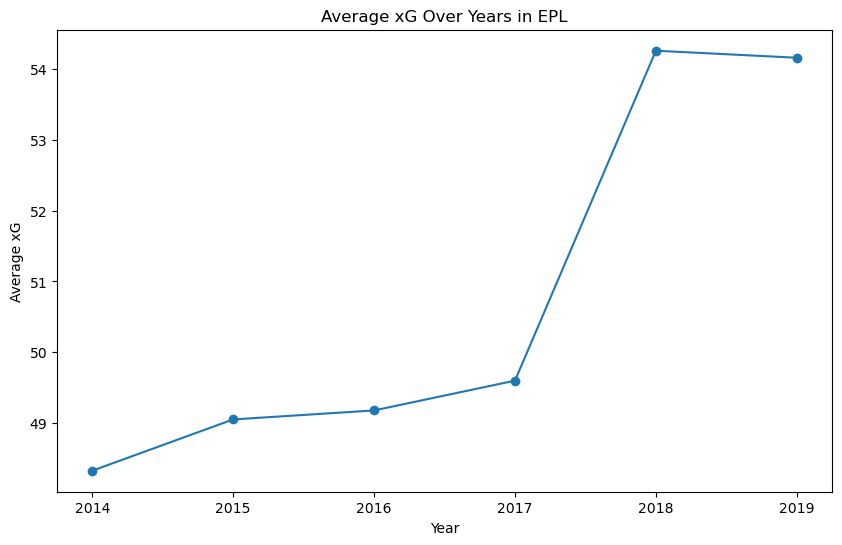

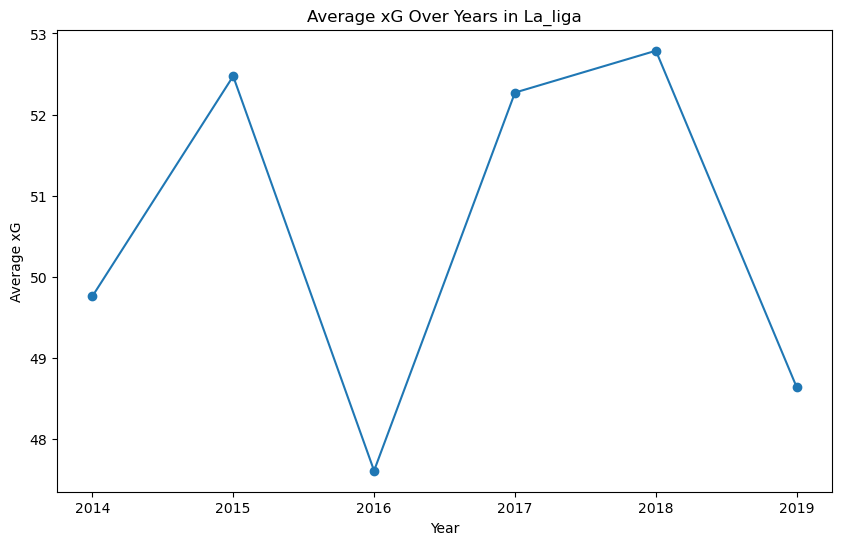

In [20]:
leagues = ['Ligue_1', 'Serie_A', 'Bundesliga', 'EPL', 'La_liga']

for league in leagues:
    league_data = filtered_data[filtered_data['league'] == league]

    yearly_xG = league_data.groupby('year')['xG'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(yearly_xG, marker='o')
    plt.title(f'Average xG Over Years in {league}')
    plt.ylabel('Average xG')
    plt.xlabel('Year')
    plt.show()

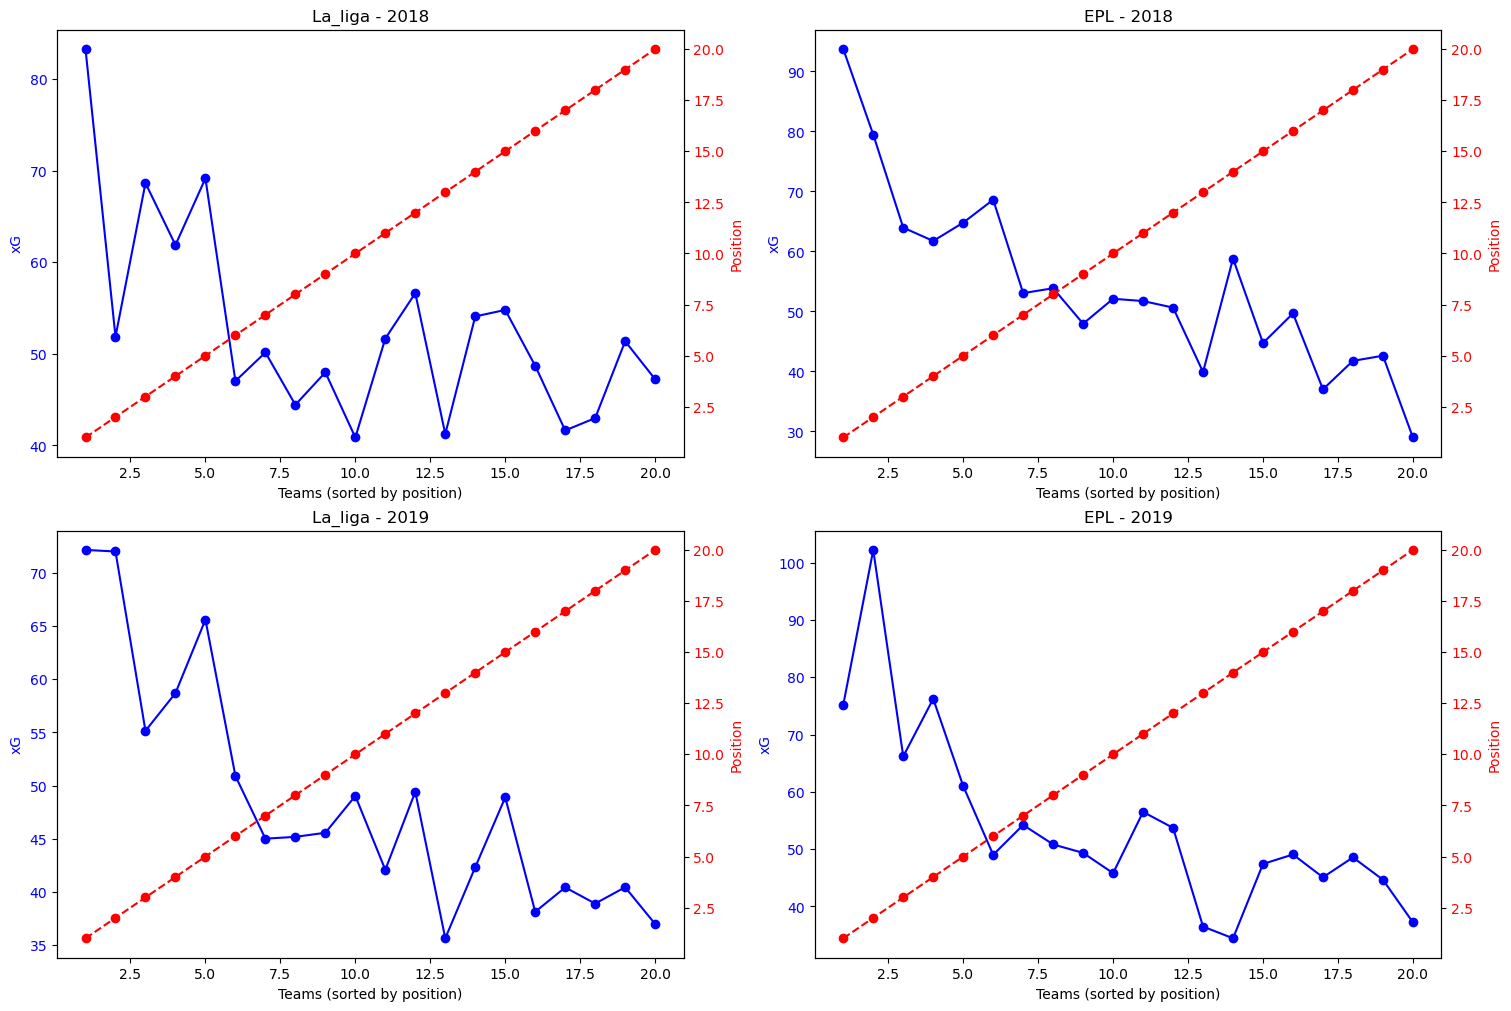

In [29]:
selected_years=[2018, 2019]
selected_leagues=['La_liga','EPL'] 
fig,axs=plt.subplots(len(selected_years),len(selected_leagues), figsize=(15, 10),constrained_layout=True)
for i, year in enumerate(selected_years):
    for j, league in enumerate(selected_leagues):
        filtered_data=xG[(xG['year']==year)&(xG['league'] ==league)]
        sorted_data=filtered_data.sort_values(by='position')
        ax1=axs[i,j]
        ax2=ax1.twinx()
        ax1.plot(sorted_data['position'],sorted_data['xG'],marker='o',color='blue', label='xG')
        ax1.set_ylabel('xG',color='blue')
        ax1.tick_params(axis='y',labelcolor='blue')
        ax2.plot(sorted_data['position'], sorted_data['position'],linestyle='--', marker='o',color='red',label='Position')
        ax2.set_ylabel('Position',color='red')
        ax2.tick_params(axis='y',labelcolor='red')
        ax1.set_title(f'{league}-{year}')
        ax1.set_xlabel('Teams(sorted by position)')

plt.show()

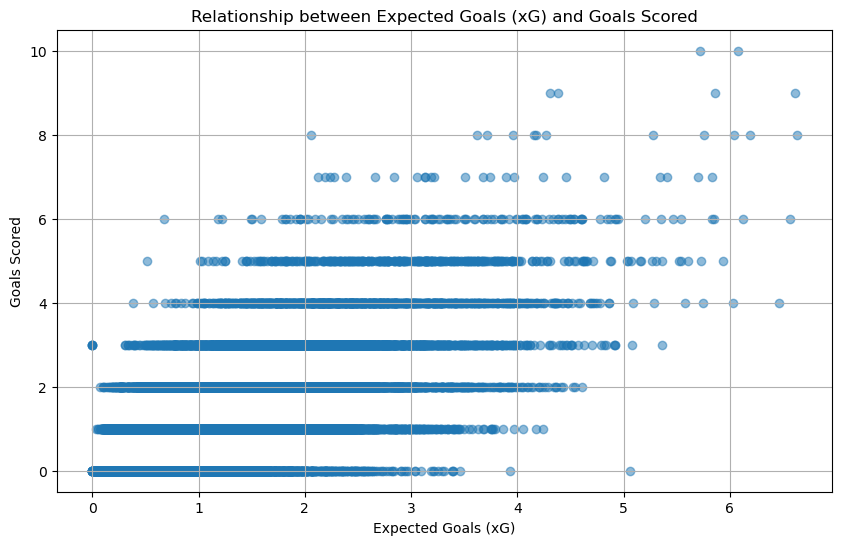

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(xG_pg['xG'], xG_pg['scored'],alpha=0.5)
m,b= np.polyfit(xG_pg['xG'], xG_pg['scored'], 1)
plt.grid(True)
plt.title('Relationship between Expected Goals (xG) and Goals Scored')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals Scored')

plt.show()

In [12]:
xG_player.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


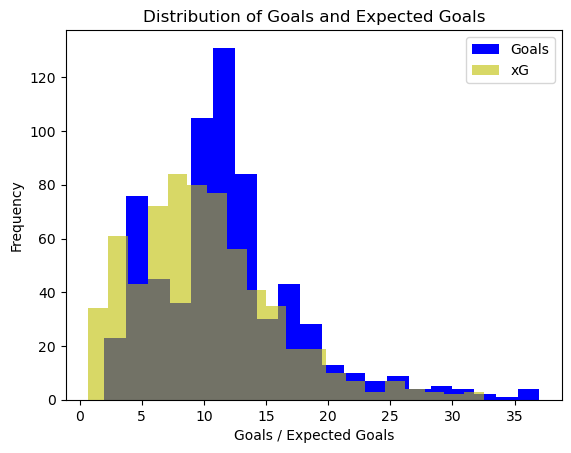

In [23]:
plt.hist(xG_player['Goals'], bins=20, label='Goals',color='b')
plt.hist(xG_player['xG'], bins=20, alpha=0.6, label='xG', color='y')

plt.xlabel('Goals / Expected Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Goals and Expected Goals')
plt.legend(loc='upper right')
plt.show()


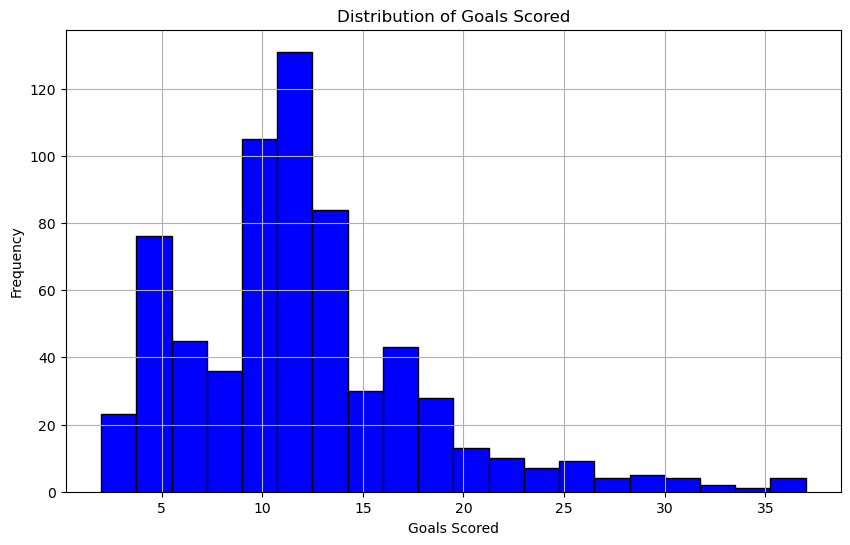

In [15]:
plt.figure(figsize=(10,6))
plt.hist(xG_player['Goals'],bins=20,color='blue',edgecolor='black')
plt.title('Distribution of Goals Scored')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

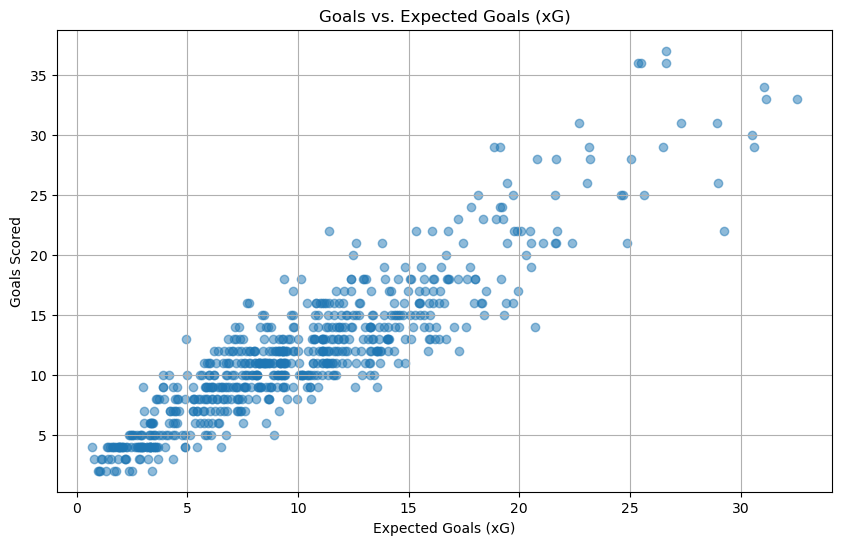

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(xG_player['xG'],xG_player['Goals'],alpha=0.5)
plt.title('Goals vs. Expected Goals (xG)')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()



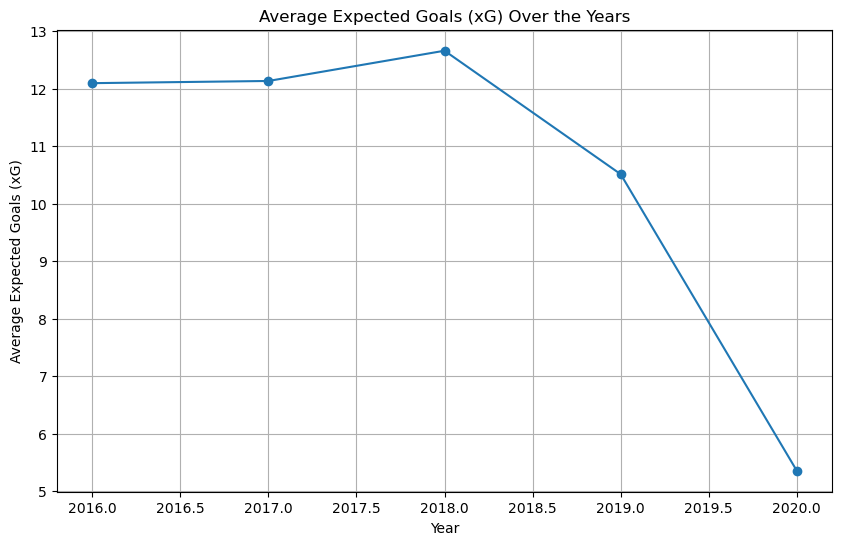

In [17]:
avg_xG_per_year=xG_player.groupby('Year')['xG'].mean().reset_index()

plt.figure(figsize=(10,6))
plt.plot(avg_xG_per_year['Year'], avg_xG_per_year['xG'], marker='o')
plt.title('Average Expected Goals (xG) Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Expected Goals (xG)')
plt.grid(True)
plt.show()


In [8]:
def determine_home_result(row):
    if row['home_score'] > row['away_score']:
        return 'win'
    elif row['home_score'] < row['away_score']:
        return 'loss'
    else:
        return 'draw'

results['home_result'] = results.apply(determine_home_result, axis=1)

def calculate_home_advantage(data):
    home_win_rate = round((data['home_result'] == 'win').mean() * 100, 2)
    home_loss_rate = round((data['home_result'] == 'loss').mean() * 100, 2)
    home_draw_rate = round((data['home_result'] == 'draw').mean() * 100, 2)
    return home_win_rate, home_loss_rate, home_draw_rate

non_neutral_matches = results[results['neutral'] == False]
non_neutral_advantage = calculate_home_advantage(non_neutral_matches)

neutral_matches = results[results['neutral'] == True]
neutral_advantage = calculate_home_advantage(neutral_matches)

print("Non-Neutral Ground Home Advantage:", non_neutral_advantage)
print("Neutral Ground Home Advantage:", neutral_advantage)


Non-Neutral Ground Home Advantage: (50.58, 26.38, 23.04)
Neutral Ground Home Advantage: (42.97, 34.19, 22.84)
